In [2]:
pip install --upgrade git+https://github.com/stanfordmlgroup/ngboost.git

  Cloning https://github.com/stanfordmlgroup/ngboost.git to /tmp/pip-req-build-et0hkth7
  Running command git clone --filter=blob:none --quiet https://github.com/stanfordmlgroup/ngboost.git /tmp/pip-req-build-et0hkth7
  Resolved https://github.com/stanfordmlgroup/ngboost.git to commit 81aad428b897876506cfb62f3859e2d6b159bd33
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 9.8 MB/s eta 0:00:00
  Created wheel for ngboost: filename=ngboost-0.4.1.dev0-py3-none-any.whl size=33335 sha256=65d7ad33fa55ba326df34f5db58a1737762c772fe39e4cc7ee975a6e6c285811
  Stored in directory: /tmp/pip-ephem-wheel-cache-ureu_mu5/wheels/0c/dd/a6/060cbb99ba4fd084342949d020825291468b3a7f3b32a6f3b4
  Created wheel for autograd-gamma: filename=autograd

In [205]:
pip install quantile-forest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 70.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.2 which is incompatible.


In [211]:
#Load libraries

import pandas as pd
import numpy as np
np.random.seed(1) #fix seed for notebook
import scipy
from functools import partial


import matplotlib as inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from plotnine import *
from mizani.breaks import date_breaks

from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
import lightgbm as lgb
from lightgbm.sklearn import LGBMClassifier
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import  r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from ngboost import NGBRegressor
from ngboost.distns import Exponential, Normal
from ngboost.scores import CRPScore
from scipy.stats import expon, norm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_pinball_loss, mean_squared_error
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import make_scorer
from pprint import pprint
from sklearn.base import clone
from sklearn.tree import DecisionTreeRegressor
from quantile_forest import RandomForestQuantileRegressor
from sklearn.model_selection import KFold


from  datetime import datetime, timedelta
import gc

In [4]:
#load csv file

from google.colab import files
uploaded = files.upload()

Saving nurse_eng_ml.csv to nurse_eng_ml.csv


In [251]:
## load data and remove unneccessary columns

nurse_df = pd.read_csv('nurse_eng_ml.csv')

nurse_tidy = nurse_df.drop(['Unnamed: 0', "org_code", "nhse_region_code", "ics_code"], axis = 1)

(Text(0.5, 1.0, 'Correlation Matrix for Features'),)

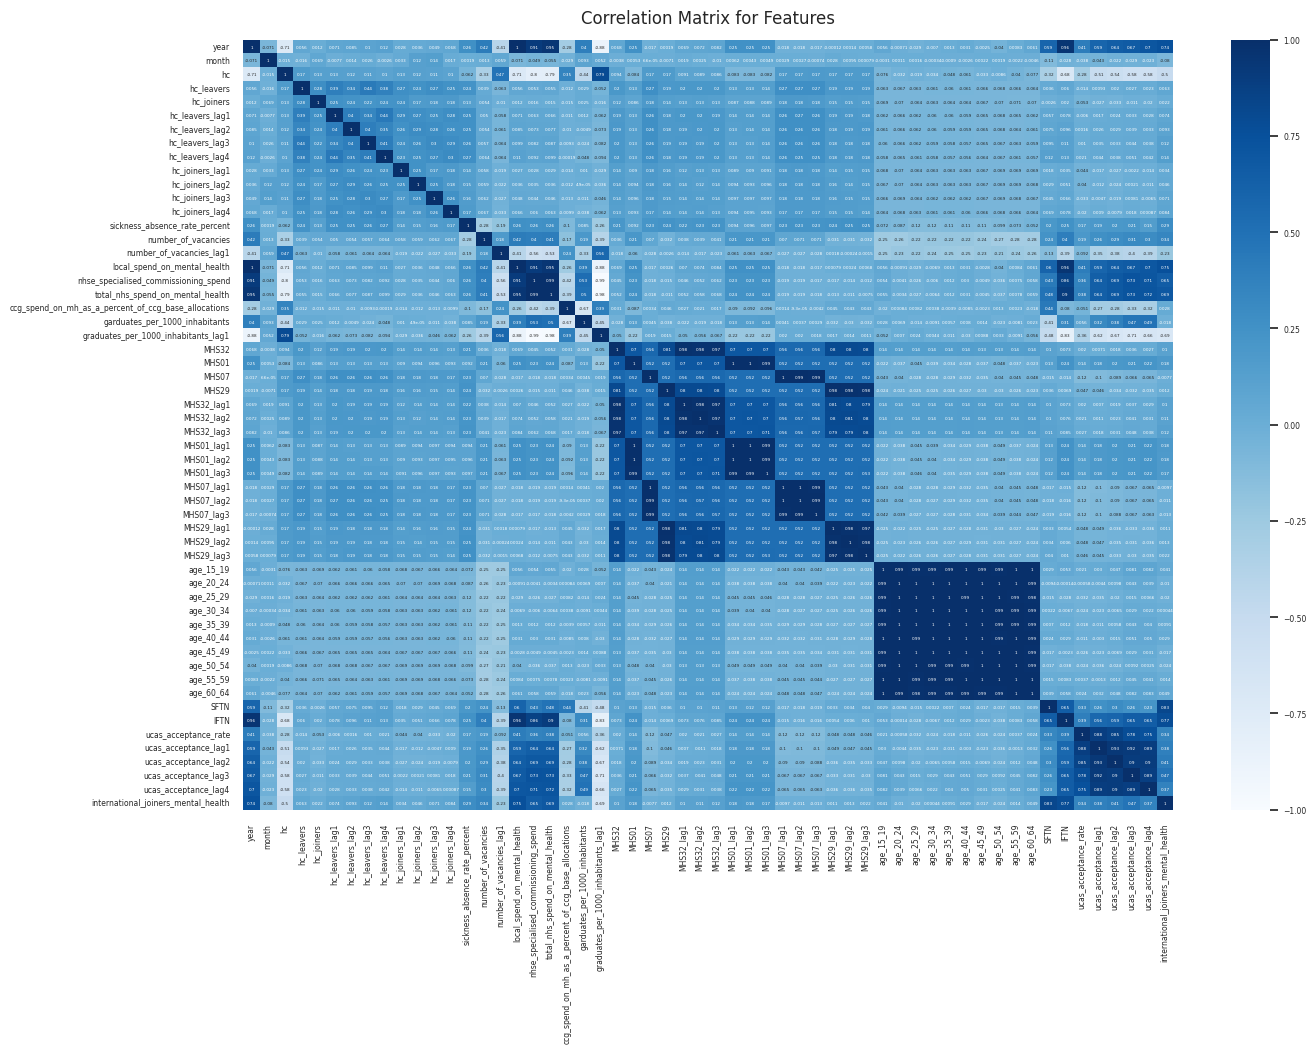

In [252]:
## correlation plot

plt.figure(figsize=(15, 10))

sns.set(font_scale= 0.5)

heatmap = sns.heatmap(nurse_tidy.iloc[:, 0:56].corr(), vmin=-1, vmax=1, annot=True, cmap="Blues", annot_kws = {"fontsize":3})

heatmap.set_title('Correlation Matrix for Features', fontdict={'fontsize':12}, pad=12),

In [266]:
## #Train and Test data set

# I use 2018 Jun - 2022 Dec as the training set

train = nurse_tidy[nurse_tidy['year'] <= 2022]

val = nurse_tidy[nurse_tidy['year'] > 2022]

pred = val

In [254]:
## drop forecasting variable

X_train = train.drop(['hc'], axis = 1)
y_train = train["hc"]

X_test = val.drop(['hc'], axis = 1)
y_test = val["hc"]


XGBoost

In [15]:
#XGBoost

xgb_model = XGBRegressor().fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

xgb_pr = pd.DataFrame({'XGB_PRED': xgb_pred}, index = y_test.index)

pred['XGB_PR'] = xgb_pr['XGB_PRED']

<ipython-input-15-3dd428b082c9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


LightGBM

In [10]:
#Light GBM

lgbm = LGBMClassifier()

lgbm_model = lgbm.fit(X_train, y_train)

lgbm_pred = lgbm_model.predict(X_test)

lgbm_pr = pd.DataFrame({'LGBM_PRED': lgbm_pred}, index = y_test.index)

pred['LGBM_PR'] = lgbm_pr['LGBM_PRED']

<ipython-input-10-ac0f9759bb11>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RandomForest

In [16]:
#Random forest

clf = RandomForestRegressor(n_estimators=100, max_samples = 0.4)

rf_model = clf.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_pr = pd.DataFrame({'RF_PRED': rf_pred}, index = y_test.index)

pred['RF_PR'] = rf_pr['RF_PRED']

<ipython-input-16-537fff1fef18>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


NGBoost

In [17]:
#NGBoost

ngb_model = NGBRegressor(Dist=Normal, verbose=True, Score=CRPScore).fit(X_train, y_train)

ngb_pred = ngb_model.predict(X_test)

ngb_pred_prob = ngb_model.pred_dist(X_test)

[iter 0] loss=357.1613 val_loss=0.0000 scale=512.0000 norm=425.0739
[iter 100] loss=202.0516 val_loss=0.0000 scale=512.0000 norm=323.9473
[iter 200] loss=125.1876 val_loss=0.0000 scale=512.0000 norm=367.0654
[iter 300] loss=96.1536 val_loss=0.0000 scale=512.0000 norm=448.1789
[iter 400] loss=82.9711 val_loss=0.0000 scale=128.0000 norm=115.1486


In [52]:
## Model tuning

b1 = DecisionTreeRegressor(criterion='friedman_mse', max_depth=2)
b2 = DecisionTreeRegressor(criterion='friedman_mse', max_depth=4)

param_grid = {
    'minibatch_frac': [1.0, 0.5],
    'Base': [b1, b2]
}

ngb = NGBRegressor(Dist=Normal, verbose=False)

grid_search = GridSearchCV(ngb, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'Base': DecisionTreeRegressor(criterion='friedman_mse', max_depth=4), 'minibatch_frac': 1.0}


In [55]:
ngb_grid = {'n_estimators': [500, 1000],
             'learning_rate': [0.1, 0.01, 0.5],
             'max_depth': range(3,4,5),
             }

ngb = NGBRegressor(Dist=Normal, verbose=False)

ngb_cv_model = GridSearchCV(ngb, ngb_grid, cv=5, n_jobs = -1, verbose = 2)

ngb_cv_model.fit(X_train, y_train)

ngb_cv_model.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 1000}

In [58]:
## Retrain model

ngb_model = NGBRegressor(Dist=Normal, verbose=True, Score=CRPScore, n_estimators=1000).fit(X_train, y_train)

ngb_pred = ngb_model.predict(X_test)

ngb_pred_prob = ngb_model.pred_dist(X_test)

[iter 0] loss=357.1613 val_loss=0.0000 scale=512.0000 norm=425.0739
[iter 100] loss=202.0516 val_loss=0.0000 scale=512.0000 norm=323.9473
[iter 200] loss=125.1876 val_loss=0.0000 scale=512.0000 norm=367.0654
[iter 300] loss=96.1536 val_loss=0.0000 scale=512.0000 norm=448.1789
[iter 400] loss=82.9711 val_loss=0.0000 scale=128.0000 norm=115.1486
[iter 500] loss=76.3108 val_loss=0.0000 scale=8.0000 norm=7.2198


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:292: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:29: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:30: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:70: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:71: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:70: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:71: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:71: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.10/dist-packages/ngboost/di

[iter 600] loss=75.6713 val_loss=0.0000 scale=0.5000 norm=0.4537


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:292: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:292: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:29: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:30: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:70: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:71: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:70: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:71: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.10/dist-packages/

[iter 700] loss=75.4200 val_loss=0.0000 scale=0.0020 norm=0.0038


/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:70: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:71: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:70: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:71: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:70: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:71: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:70: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:71: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:70: RuntimeWarning:

[iter 800] loss=75.4083 val_loss=0.0000 scale=0.0156 norm=0.0163


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:292: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:29: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:30: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:70: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:71: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:70: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:71: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:70: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.10/dist-packages/ngboost/distn

[iter 900] loss=75.3418 val_loss=0.0000 scale=0.0156 norm=0.0161


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:292: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:292: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:29: RuntimeWarning: overflow encountered in true_divide
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:70: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:71: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:70: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:71: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.10/dist-packages/ngboost/distns/normal.py:70: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.10/dist-packages/ngboost/distns/n

In [242]:
## NGBoost prediction

loc = ngb_pred_prob.params.get("loc")

scale = ngb_pred_prob.params.get("scale")

confidence_interval = 0.05

ci = norm.interval(confidence_interval, loc = loc, scale = loc)

lower_bound = ci[0]

upper_bound = ci[1]

ngb_pred_final = pd.DataFrame({'ngb_lower_bound':lower_bound, 'ngb_mean': ngb_pred, 'ngb_upper_bound':upper_bound}, index = y_test.index)

Text(0.5, 1.0, 'scale param')

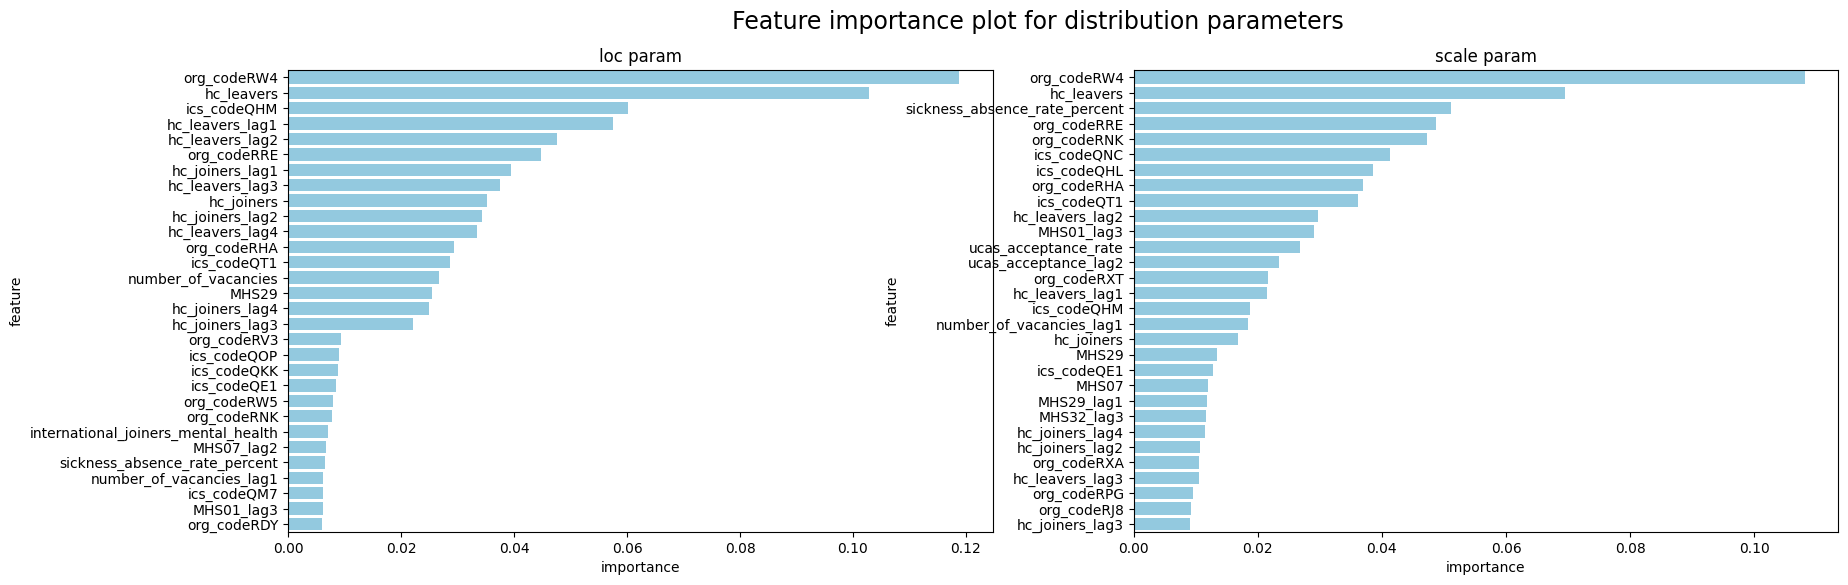

In [77]:
## Feature importance

## Feature importance for loc trees
feature_importance_loc = ngb_model.feature_importances_[0]

## Feature importance for scale trees
feature_importance_scale = ngb_model.feature_importances_[1]

df_loc = pd.DataFrame({'feature':X_test.columns.values.tolist(),
                       'importance':feature_importance_loc})\
    .sort_values('importance',ascending=False).head(30)

df_scale = pd.DataFrame({'feature':X_test.columns.values.tolist(),
                       'importance':feature_importance_scale})\
    .sort_values('importance',ascending=False).head(30)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle("Feature importance plot for distribution parameters", fontsize=17)
sns.barplot(x='importance',y='feature',ax=ax1,data=df_loc, color="skyblue").set_title('loc param')
sns.barplot(x='importance',y='feature',ax=ax2,data=df_scale, color="skyblue").set_title('scale param')

GradientBoosting

In [48]:
## GradiantBoosting

gbr_models = {}

common_params = dict(
    learning_rate=0.05,
    n_estimators=200,
    max_depth=2,
    min_samples_leaf=9,
    min_samples_split=9,
)

for alpha in [0.05, 0.5, 0.95]:
    gbr = GradientBoostingRegressor(loss="quantile", alpha=alpha, **common_params)
    gbr_models["q %1.2f" % alpha] = gbr.fit(X_train, y_train)

# Predict
pred['lower'] = gbr_models["q 0.05"].predict(X_test)
pred['mid'] = gbr_models["q 0.50"].predict(X_test)
pred['upper'] = gbr_models["q 0.95"].predict(X_test)

<ipython-input-48-63ff3e975707>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-48-63ff3e975707>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-48-63ff3e975707>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [39]:
## Calibration of the confidence interval - GradientBoosting

def coverage_fraction(y, y_low, y_high):
    return np.mean(np.logical_and(y >= y_low, y <= y_high))


coverage_fraction(
    y_train,
    gbr_models["q 0.05"].predict(X_train),
    gbr_models["q 0.95"].predict(X_train),
)

0.91440329218107

In [41]:
## Tuning the hyper-parameters of the quantile regressors

param_grid = dict(
    learning_rate=[0.05, 0.1, 0.2],
    max_depth=[2, 5, 10],
    min_samples_leaf=[1, 5, 10, 20],
    min_samples_split=[5, 10, 20, 30, 50],
)

alpha = 0.05

neg_mean_pinball_loss_05p_scorer = make_scorer(
    mean_pinball_loss,
    alpha=alpha,
    greater_is_better=False,  # maximize the negative loss
)

gbr = GradientBoostingRegressor(loss="quantile", alpha=alpha, random_state=0)

search_05p = HalvingRandomSearchCV(
    gbr,
    param_grid,
    resource="n_estimators",
    max_resources=250,
    min_resources=50,
    scoring=neg_mean_pinball_loss_05p_scorer,
    n_jobs=2,
    random_state=0,
).fit(X_train, y_train)

pprint(search_05p.best_params_)

{'learning_rate': 0.1,
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 150}


In [43]:
#hyper-parameters for the .95 percentile regressor

alpha = 0.95

neg_mean_pinball_loss_95p_scorer = make_scorer(
    mean_pinball_loss,
    alpha=alpha,
    greater_is_better=False,  # maximize the negative loss
)

search_95p = clone(search_05p).set_params(
    estimator__alpha=alpha,
    scoring=neg_mean_pinball_loss_95p_scorer,
)

search_95p.fit(X_train, y_train)

pprint(search_95p.best_params_)

## hyper-parameters for the 95th percentile regressor identified by the search procedure are roughly in the same range as the hand- tuned hyper-parameters for the median regressor and the hyper-parameters identified by the search procedure

{'learning_rate': 0.1,
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 150}


In [234]:
## retrain the model

gbr_models = {}

common_params = dict(
    learning_rate=0.1,
    n_estimators=150,
    max_depth=10,
    min_samples_leaf=5,
    min_samples_split=10,
)

for alpha in [0.05, 0.5, 0.95]:
    gbr = GradientBoostingRegressor(loss="quantile", alpha=alpha, **common_params)
    gbr_models["q %1.2f" % alpha] = gbr.fit(X_train, y_train)

# Predict
pred['lower'] = gbr_models["q 0.05"].predict(X_test)
pred['mid'] = gbr_models["q 0.50"].predict(X_test)
pred['upper'] = gbr_models["q 0.95"].predict(X_test)

<ipython-input-234-2eff543a9e06>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-234-2eff543a9e06>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-234-2eff543a9e06>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [47]:
## Calibration of the confidence interval - GradientBoosting

def coverage_fraction(y, y_low, y_high):
    return np.mean(np.logical_and(y >= y_low, y <= y_high))


coverage_fraction(
    y_train,
    gbr_models["q 0.05"].predict(X_train),
    gbr_models["q 0.95"].predict(X_train),
)

## previous model performs slightly better compared to tunned model

0.8979423868312757

In [243]:
## prepare pred df

gb_pred_final = pd.DataFrame({'gb_lower_bound':pred['mid'], 'gb_mean': pred['lower'], 'gb_upper_bound':pred['upper']}, index = y_test.index)

Text(0.5, 1.0, 'Feature Importance')

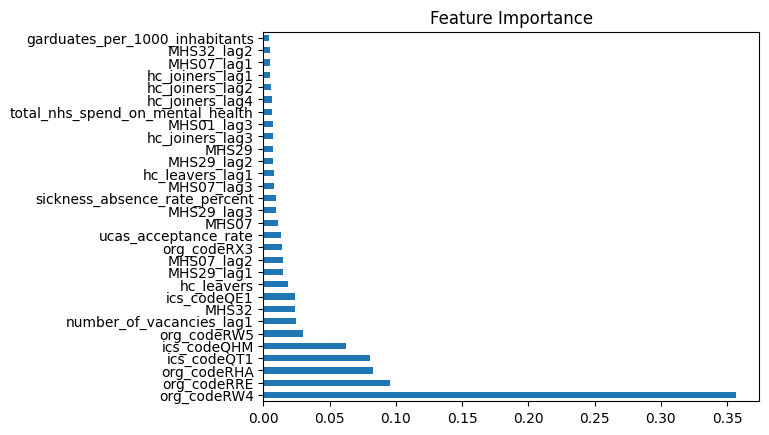

In [168]:
## Feature importance

feat_importances = pd.Series(gbr.feature_importances_, index=X_train.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.title("Feature Importance")

LightGBM quantile regression

In [170]:
## Define pin ball loss

def quantile_loss(y_true, y_pred, q):
    return np.max([q*(y_true - y_pred), (1-q)*(y_pred-y_true)], axis=0)

## visualise the loss function

sample_size = 100
y_true = np.zeros(sample_size)
y_pred = np.linspace(-1, 1, 100)
quantiles = [0.2, 0.5, 0.8]


plt.figure(figsize=[12, 6])
for q in quantiles:
    losses = quantile_loss(y_true, y_pred, q)
    plt.plot(y_pred, losses, label='quantile_{}'.format(q))

plt.title('quantile loss')
plt.xlabel('error')
plt.ylabel('loss')
plt.legend()

In [176]:
## lgbm

params = {
    'objective': 'quantile',
    'metric': 'quantile',
    'max_depth': 4,
    'num_leaves': 15,
    'learning_rate': 0.1,
    'n_estimators': 1000,
    'boosting_type': 'gbdt'
}

y_preds = np.zeros((len(y_test), 3))

quantiles = [.05, .5, .95]

for i in range(len(quantiles)):
    print('prediction of quantile', quantiles[i])
    lgb = LGBMRegressor(alpha=quantiles[i], **params)
    model = lgb.fit(X_train, y_train)
    y_preds[:, i] = model.predict(X_test)

prediction of quantile 0.05
prediction of quantile 0.5
prediction of quantile 0.95


In [195]:
#Model Validation and Tuning

lgbm_grid = {'n_estimators': [500, 1000, 1200],
             'learning_rate': [0.1, 0.01, 0.5],
             'max_depth': range(3,10,2),
             #'min_child_weight':range(1,6,2),
             #'colsample_bytree': [0.7, 0.8, 0.9],
             #'subsample': [0.7, 0.8, 0.9],
             #'min_child_samples': [1, 5, 10]
             }

lgbm = LGBMRegressor()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=5, n_jobs = -1, verbose = 2)

lgbm_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.5],
                         'max_depth': range(3, 10, 2),
                         'n_estimators': [500, 1000, 1200]},
             verbose=2)

In [197]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1200}

In [203]:
## retrain the model

params = {
    'objective': 'quantile',
    'metric': 'quantile',
    'max_depth': 3,
    'num_leaves': 15,
    'learning_rate': 0.1,
    'n_estimators': 1200,
    'boosting_type': 'gbdt'
}

y_preds = np.zeros((len(y_test), 3))

quantiles = [.05, .5, .95]

for i in range(len(quantiles)):
    print('prediction of quantile', quantiles[i])
    lgb = LGBMRegressor(alpha=quantiles[i], **params)
    model = lgb.fit(X_train, y_train)
    y_preds[:, i] = model.predict(X_test)

prediction of quantile 0.05
prediction of quantile 0.5
prediction of quantile 0.95


In [240]:
## prepare pred df

lgbm_pred_final = pd.DataFrame({'lgbm_lower_bound':y_preds[:,1], 'lgbm_mean': y_preds[:,0], 'lgbm_upper_bound':y_preds[:,2]}, index = y_test.index)

In [268]:
## merge predictions to original file

ml_pred = pd.concat([pred, ngb_pred_final, gb_pred_final, lgbm_pred_final], axis=1)

In [269]:
# Save file

ml_pred.to_csv("ML_pred_eng.csv", index=False)

files.download("ML_pred_eng.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

other works - appendix

<Axes: >

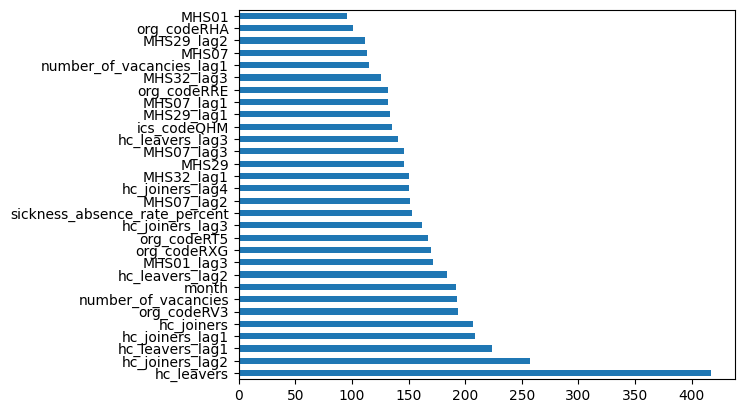

In [200]:
#Features Importance

#lgbm

import matplotlib.pyplot as plt

feat_importances = pd.Series(lgb.feature_importances_, index=X_train.columns)
feat_importances.nlargest(30).plot(kind='barh')

<Axes: >

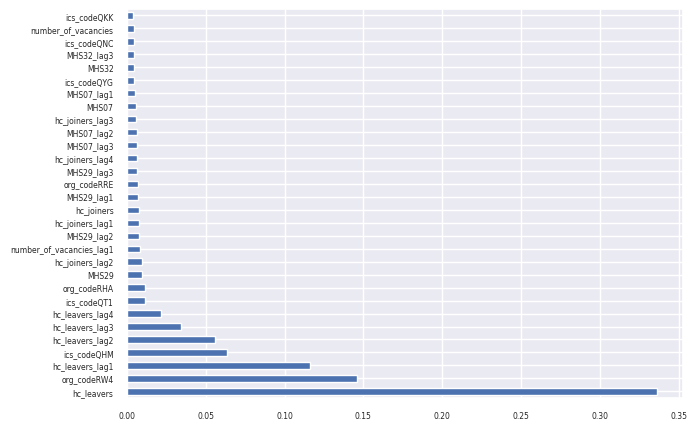

In [ ]:
#Features Importance

#Random forest

import matplotlib.pyplot as plt

feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(30).plot(kind='barh')

In [ ]:
#Model Validation and Tuning

#LGBM

lgbm_grid = {'n_estimators': [200, 500, 1000, 1200],
             'learning_rate': [0.1, 0.01, 0.5],
             'max_depth': range(3,10,2),
             #'min_child_weight':range(1,6,2),
             #'colsample_bytree': [0.7, 0.8, 0.9],
             #'subsample': [0.7, 0.8, 0.9],
             #'min_child_samples': [1, 5, 10]
             }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=5, n_jobs = -1, verbose = 2)

lgbm_cv_model.fit(X_train, y_train)

In [196]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1200}

In [ ]:
# XGB

xgb_grid = {'n_estimators': [200, 500, 1000, 1200],
             'learning_rate': [0.01, 0.1, 0.5],
             'max_depth': range(4,10,2),
             'min_child_weight':range(1,6,2),
             'colsample_bytree': [0.7, 0.8, 0.9],
             'subsample': [0.7, 0.8, 0.9],
             'min_child_samples': [1, 5, 10]}

xgb = XGBRegressor()
xgb_cv_model = GridSearchCV(xgb, xgb_grid, cv=5, n_jobs = -1, verbose = 2)

xgb_cv_model.fit(X_train, y_train)

{'learning_rate': 0.1, 'n_estimators': 1000}

In [ ]:
xgb_cv_model.best_params_

In [ ]:
## Random Forest

random_grid = {'n_estimators': [200, 500, 1000, 1200, 1500],
               'max_features': ['auto', 'sqrt'],
               'max_depth': range(3,10,2),
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_params_

In [267]:
# Save file

pred.to_csv("ML_pred_eng.csv", index=False)

files.download("ML_pred_eng.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>